In [3]:
import MDAnalysis
from MDAnalysis.tests.datafiles import PSF, DCD   # test trajectory
import numpy.linalg

u = MDAnalysis.Universe(PSF,DCD)  # always start with a Universe
# can access via segid (4AKE) and atom name
# we take the first atom named N and the last atom named C
nterm = u.select_atoms('segid 4AKE and name N')[0]
cterm = u.select_atoms('segid 4AKE and name C')[-1]

bb = u.select_atoms('protein and backbone')  # a selection (AtomGroup)

for ts in u.trajectory:     # iterate through all frames
    r = cterm.position - nterm.position # end-to-end vector from atom positions
    d = numpy.linalg.norm(r)  # end-to-end distance
    rgyr = bb.radius_of_gyration()  # method of AtomGroup
    print("frame = {0}: d = {1} A, Rgyr = {2} A".format(
          ts.frame, d, rgyr))

frame = 0: d = 11.712209701538086 A, Rgyr = 16.435122177229168 A
frame = 1: d = 11.437788963317871 A, Rgyr = 16.446379905942546 A
frame = 2: d = 11.20651912689209 A, Rgyr = 16.514262645778793 A
frame = 3: d = 10.541850090026855 A, Rgyr = 16.537608886324765 A
frame = 4: d = 10.559649467468262 A, Rgyr = 16.55608518672762 A
frame = 5: d = 10.744684219360352 A, Rgyr = 16.508550427764558 A
frame = 6: d = 10.879876136779785 A, Rgyr = 16.5880977180091 A
frame = 7: d = 10.3356351852417 A, Rgyr = 16.585374810361454 A
frame = 8: d = 10.72763442993164 A, Rgyr = 16.607154565230854 A
frame = 9: d = 11.756329536437988 A, Rgyr = 16.63273502135565 A
frame = 10: d = 11.579389572143555 A, Rgyr = 16.661952763645147 A
frame = 11: d = 11.506628036499023 A, Rgyr = 16.66524103082432 A
frame = 12: d = 10.815601348876953 A, Rgyr = 16.67847652555996 A
frame = 13: d = 10.514074325561523 A, Rgyr = 16.725832721672983 A
frame = 14: d = 10.491043090820312 A, Rgyr = 16.748083041365195 A
frame = 15: d = 10.60844039916

/home/atonixdevmaster/miniconda3/lib/python3.12/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [4]:
from scipy.fft import fft, ifft
import numpy as np
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x)
y
yinv = ifft(y)
yinv

array([ 1. +0.j,  2. +0.j,  1. +0.j, -1. +0.j,  1.5+0.j])

In [5]:
np.sum(x)

4.5

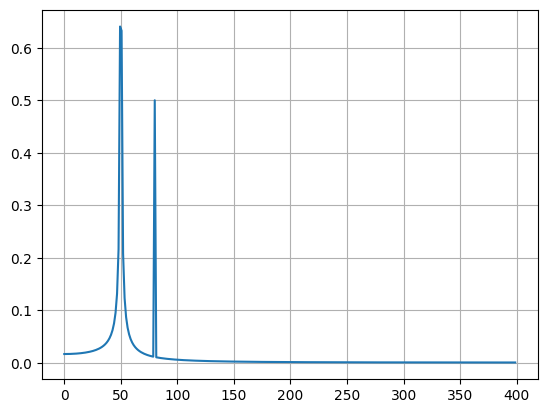

In [6]:
from scipy.fft import fft, fftfreq
import numpy as np
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()